In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("../../../../Downloads/dietanic_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

TypeError: countplot() got multiple values for argument 'data'

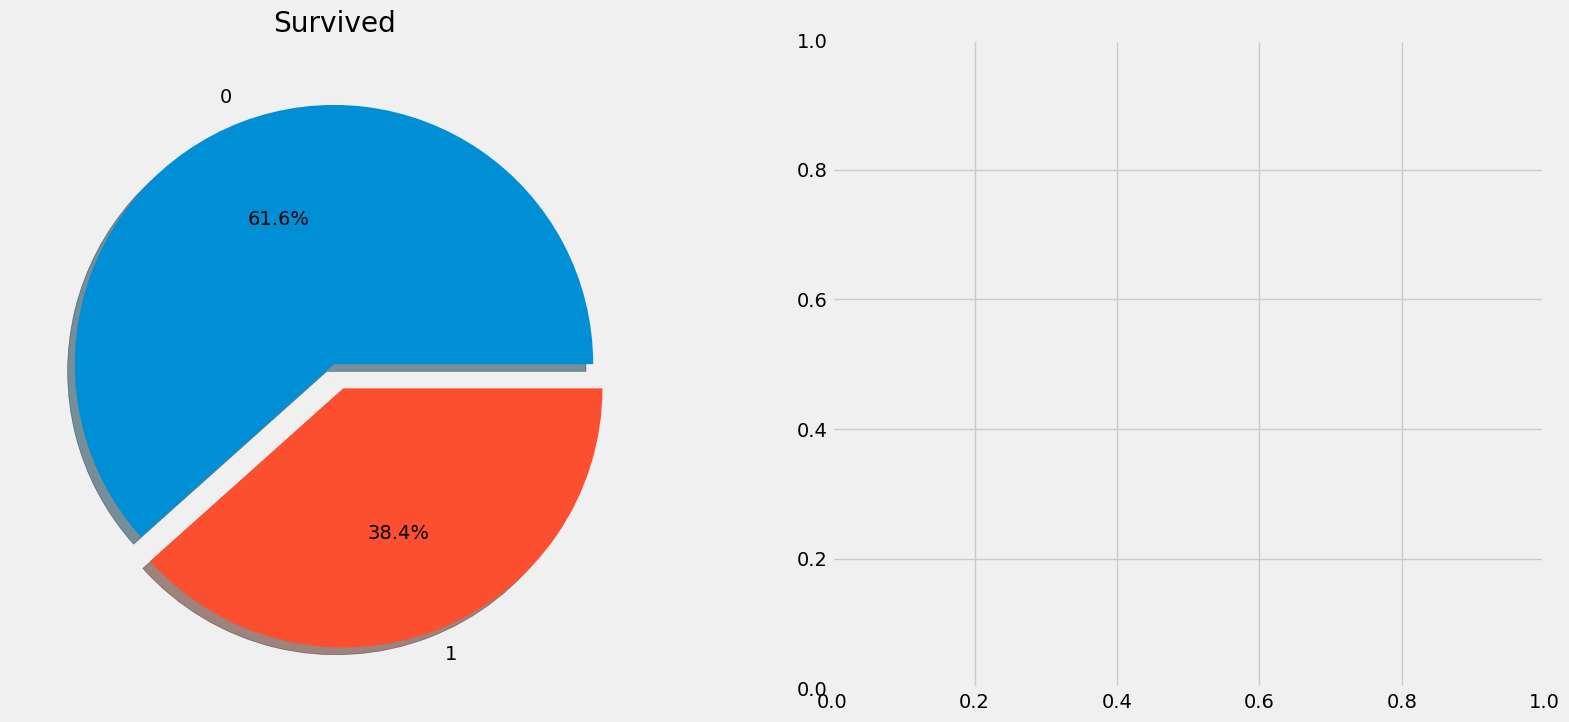

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [4]:
data_2 = pd.read_csv("../../../../Downloads/dietanic_train.csv")

In [5]:
train_x = data_2.drop(['PassengerId'], axis=1)
test_x = pd.read_csv("../../../../Downloads/dietanic_test.csv")
test_x = test_x.drop(['PassengerId'], axis=1)

In [6]:
train_x.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_x = train_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

for c in ["Sex", "Embarked"]:
    le = LabelEncoder()
    # Fit the encoder to the column after dropping NA values
    le.fit(train_x[c].dropna())
    # Transform the data for both training and test sets, ensuring to handle NAs appropriately
    train_x[c] = train_x[c].map(lambda x: le.transform([x])[0] if pd.notna(x) else x)
    test_x[c] = test_x[c].map(lambda x: le.transform([x])[0] if pd.notna(x) else x)


In [12]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=20, random_state=71)
model.fit(train_x, train_y)

pred = model.predict_proba(test_x)[:, 1]

pred_label = np.where(pred > 0.5, 1, 0)

ModuleNotFoundError: No module named 'xgboost'

In [18]:
#practice

from sklearn.metrics import mean_squared_error
import numpy as np

y_true = [1.0, 1.5, 2.0, 1.2, 1.8]
y_pred = [0.8, 1.5, 1.8, 1.3, 3.0]

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

0.5531726674375732


In [21]:
from sklearn.metrics import confusion_matrix

y_true = [1,0,1,1,0,1,1,0]
y_pred = [0,0,1,1,0,0,1,1]

tp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
tn = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
fp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))
fn = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))

confusion_matrix1 = np.array([[tp, fp], [fn, tn]])
print(confusion_matrix1)

[[3 2]
 [1 2]]


In [22]:
from sklearn.metrics import log_loss

y_true = [1,0,1,1,0,1]
y_prob = [0.1,0.2,0.8,0.8,0.1,0.3]

logloss = log_loss(y_true,y_prob)
print(logloss)

0.7135581778200728


In [23]:
data = pd.read_csv("../../../../Downloads/dietanic_train.csv")

In [30]:
import xgboost as xgb
from sklearn.metrics import log_loss

train = pd.read_csv('../../../../Downloads/dietanic_train.csv')
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']
test_x = pd.read_csv('../../../../Downloads/dietanic_test.csv')

In [28]:
from sklearn.model_selection import KFold

In [32]:
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]

# 学習データを学習データとバリデーションデータに分ける
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [34]:
dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Name: object, Sex: object, Ticket: object, Cabin: object, Embarked: object

In [35]:
import numpy as np
import pandas as pd

# -----------------------------------
# 学習データ、テストデータの読み込み
# -----------------------------------
# 学習データ、テストデータの読み込み
train = pd.read_csv('../../../../Downloads/dietanic_train.csv')
test = pd.read_csv('../../../../Downloads/dietanic_test.csv')

# 学習データを特徴量と目的変数に分ける
train_x = train.drop(['Survived'], axis=1)
train_y = train['Survived']

# テストデータは特徴量のみなので、そのままでよい
test_x = test.copy()

# -----------------------------------
# 特徴量作成
# -----------------------------------
from sklearn.preprocessing import LabelEncoder

# 変数PassengerIdを除外する
train_x = train_x.drop(['PassengerId'], axis=1)
test_x = test_x.drop(['PassengerId'], axis=1)

# 変数Name, Ticket, Cabinを除外する
train_x = train_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x = test_x.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# それぞれのカテゴリ変数にlabel encodingを適用する
for c in ['Sex', 'Embarked']:
    # 学習データに基づいてどう変換するかを定める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA'))

    # 学習データ、テストデータを変換する
    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

# -----------------------------------
# モデル作成
# -----------------------------------
from xgboost import XGBClassifier

# モデルの作成および学習データを与えての学習
model = XGBClassifier(n_estimators=20, random_state=71)
model.fit(train_x, train_y)

# テストデータの予測値を確率で出力する
pred = model.predict_proba(test_x)[:, 1]

# テストデータの予測値を二値に変換する
pred_label = np.where(pred > 0.5, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_label})
submission.to_csv('submission_first.csv', index=False)
# スコア：0.7799（本書中の数値と異なる可能性があります）

# -----------------------------------
# バリデーション
# -----------------------------------
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

# 各foldのスコアを保存するリスト
scores_accuracy = []
scores_logloss = []

# クロスバリデーションを行う
# 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    # 学習データを学習データとバリデーションデータに分ける
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習を行う
    model = XGBClassifier(n_estimators=20, random_state=71)
    model.fit(tr_x, tr_y)

    # バリデーションデータの予測値を確率で出力する
    va_pred = model.predict_proba(va_x)[:, 1]

    # バリデーションデータでのスコアを計算する
    logloss = log_loss(va_y, va_pred)
    accuracy = accuracy_score(va_y, va_pred > 0.5)

    # そのfoldのスコアを保存する
    scores_logloss.append(logloss)
    scores_accuracy.append(accuracy)

# 各foldのスコアの平均を出力する
logloss = np.mean(scores_logloss)
accuracy = np.mean(scores_accuracy)
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}')
# logloss: 0.4270, accuracy: 0.8148（本書中の数値と異なる可能性があります）

# -----------------------------------
# モデルチューニング
# -----------------------------------
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1.0, 2.0, 4.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        logloss = log_loss(va_y, va_pred)
        score_folds.append(logloss)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')
# max_depth=7, min_child_weight=2.0のスコアが最もよかった


# -----------------------------------
# ロジスティック回帰用の特徴量の作成
# -----------------------------------
from sklearn.preprocessing import OneHotEncoder

# 元データをコピーする
train_x2 = train.drop(['Survived'], axis=1)
test_x2 = test.copy()

# 変数PassengerIdを除外する
train_x2 = train_x2.drop(['PassengerId'], axis=1)
test_x2 = test_x2.drop(['PassengerId'], axis=1)

# 変数Name, Ticket, Cabinを除外する
train_x2 = train_x2.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_x2 = test_x2.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# one-hot encodingを行う
cat_cols = ['Sex', 'Embarked', 'Pclass']
ohe = OneHotEncoder(categories='auto', sparse=False)
ohe.fit(train_x2[cat_cols].fillna('NA'))

# one-hot encodingのダミー変数の列名を作成する
ohe_columns = []
for i, c in enumerate(cat_cols):
    ohe_columns += [f'{c}_{v}' for v in ohe.categories_[i]]

# one-hot encodingによる変換を行う
ohe_train_x2 = pd.DataFrame(ohe.transform(train_x2[cat_cols].fillna('NA')), columns=ohe_columns)
ohe_test_x2 = pd.DataFrame(ohe.transform(test_x2[cat_cols].fillna('NA')), columns=ohe_columns)

# one-hot encoding済みの変数を除外する
train_x2 = train_x2.drop(cat_cols, axis=1)
test_x2 = test_x2.drop(cat_cols, axis=1)

# one-hot encodingで変換された変数を結合する
train_x2 = pd.concat([train_x2, ohe_train_x2], axis=1)
test_x2 = pd.concat([test_x2, ohe_test_x2], axis=1)

# 数値変数の欠損値を学習データの平均で埋める
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
for col in num_cols:
    train_x2[col].fillna(train_x2[col].mean(), inplace=True)
    test_x2[col].fillna(train_x2[col].mean(), inplace=True)

# 変数Fareを対数変換する
train_x2['Fare'] = np.log1p(train_x2['Fare'])
test_x2['Fare'] = np.log1p(test_x2['Fare'])

# -----------------------------------
# アンサンブル
# -----------------------------------
from sklearn.linear_model import LogisticRegression

# xgboostモデル
model_xgb = XGBClassifier(n_estimators=20, random_state=71)
model_xgb.fit(train_x, train_y)
pred_xgb = model_xgb.predict_proba(test_x)[:, 1]

# ロジスティック回帰モデル
# xgboostモデルとは異なる特徴量を入れる必要があるので、別途train_x2, test_x2を作成した
model_lr = LogisticRegression(solver='lbfgs', max_iter=300)
model_lr.fit(train_x2, train_y)
pred_lr = model_lr.predict_proba(test_x2)[:, 1]

# 予測値の加重平均をとる
pred = pred_xgb * 0.8 + pred_lr * 0.2
pred_label = np.where(pred > 0.5, 1, 0)

logloss: 0.4360, accuracy: 0.8260
max_depth: 3, min_child_weight: 4.0


In [36]:
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]

# 学習データを学習データとバリデーションデータに分ける
tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

In [37]:
dtrain = xgb.DMatrix(tr_x, label=tr_y)
dvalid = xgb.DMatrix(va_x, label=va_y)

In [38]:
dtrain.head()

AttributeError: 'DMatrix' object has no attribute 'head'

In [39]:
# カスタム目的関数（この場合はloglossであり、xgboostの'binary:logistic'と等価）
def logregobj(preds, dtrain):
    labels = dtrain.get_label()  # 真の値のラベルを取得
    preds = 1.0 / (1.0 + np.exp(-preds))  # シグモイド関数
    grad = preds - labels  # 勾配
    hess = preds * (1.0 - preds)  # 二階微分値
    return grad, hess


# カスタム評価指標（この場合は誤答率）
def evalerror(preds, dtrain):
    labels = dtrain.get_label()  # 真の値のラベルを取得
    return 'custom-error', float(sum(labels != (preds > 0.0))) / len(labels)


# ハイパーパラメータの設定
params = {'silent': 1, 'random_state': 71}
num_round = 50
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

# モデルの学習の実行
bst = xgb.train(params, dtrain, num_round, watchlist, obj=logregobj, feval=evalerror)

# 目的関数にbinary:logisticを指定したときと違い、確率に変換する前の値で予測値が出力されるので変換が必要
pred_val = bst.predict(dvalid)
pred = 1.0 / (1.0 + np.exp(-pred_val))
logloss = log_loss(va_y, pred)
print(logloss)

[0]	train-rmse:0.37810	train-custom-error:0.19611	eval-rmse:0.38297	eval-custom-error:0.27803
[1]	train-rmse:0.59523	train-custom-error:0.14072	eval-rmse:0.60062	eval-custom-error:0.21973
[2]	train-rmse:0.82951	train-custom-error:0.13473	eval-rmse:0.83481	eval-custom-error:0.21525
[3]	train-rmse:1.03353	train-custom-error:0.12425	eval-rmse:1.03915	eval-custom-error:0.21076
[4]	train-rmse:1.20808	train-custom-error:0.11377	eval-rmse:1.22410	eval-custom-error:0.19282
[5]	train-rmse:1.35545	train-custom-error:0.11527	eval-rmse:1.37534	eval-custom-error:0.15695
[6]	train-rmse:1.49444	train-custom-error:0.11377	eval-rmse:1.52480	eval-custom-error:0.16592
[7]	train-rmse:1.60759	train-custom-error:0.11677	eval-rmse:1.63725	eval-custom-error:0.17040
[8]	train-rmse:1.69279	train-custom-error:0.11227	eval-rmse:1.72969	eval-custom-error:0.16143
[9]	train-rmse:1.76966	train-custom-error:0.10778	eval-rmse:1.80963	eval-custom-error:0.15695
[10]	train-rmse:1.82795	train-custom-error:0.09880	eval-rmse

In [40]:
# Fair 関数
def fair(preds, dtrain):
    x = preds - dtrain.get_labels()  # 残差を取得
    c = 1.0  # Fair関数のパラメータ
    den = abs(x) + c  # 勾配の式の分母を計算
    grad = c * x / den  # 勾配
    hess = c * c / den ** 2  # 二階微分値
    return grad, hess


# Pseudo-Huber 関数
def psuedo_huber(preds, dtrain):
    d = preds - dtrain.get_labels()  # 残差を取得
    delta = 1.0  # Pseudo-Huber関数のパラメータ
    scale = 1 + (d / delta) ** 2
    scale_sqrt = np.sqrt(scale)
    grad = d / scale_sqrt  # 勾配
    hess = 1 / scale / scale_sqrt  # 二階微分値
    return grad, hess

In [45]:
df_wide = pd.read_csv("../../../../Downloads/time_series_wide.csv", index_col=0)

In [47]:
index_type = type(df_wide.index)
print(index_type)

<class 'pandas.core.indexes.base.Index'>


In [48]:
df_wide.index = pd.to_datetime(df_wide.index)

In [49]:
df_wide.head()

,A,B,C
2016-07-01,532,3314,1136
2016-07-02,798,2461,1188
2016-07-03,823,3522,1711
2016-07-04,937,5451,1977
2016-07-05,881,4729,1975


In [51]:
print(df_wide.iloc[:5,:3])

              A     B     C
2016-07-01  532  3314  1136
2016-07-02  798  2461  1188
2016-07-03  823  3522  1711
2016-07-04  937  5451  1977
2016-07-05  881  4729  1975


In [52]:
df_long = df_wide.stack().reset_index(1)
df_long.columns = ['id', 'value']
print(df_long.head())

           id  value
2016-07-01  A    532
2016-07-01  B   3314
2016-07-01  C   1136
2016-07-02  A    798
2016-07-02  B   2461


In [56]:
df_wide = pd.read_csv("../../../../Downloads/time_series_wide.csv", index_col=0)
df_wide.index = pd.to_datetime(df_wide.index)

In [57]:
x = df_wide

In [58]:
print(x)

              A     B     C
2016-07-01  532  3314  1136
2016-07-02  798  2461  1188
2016-07-03  823  3522  1711
2016-07-04  937  5451  1977
2016-07-05  881  4729  1975
...         ...   ...   ...
2016-12-27  840  4573  1850
2016-12-28  943  4511  1764
2016-12-29  978  4599  1787
2016-12-30  907  4243  2069
2016-12-31  869  4703  2233

[184 rows x 3 columns]


In [59]:
# 1期前のlagを取得
x_lag1 = x.shift(1)

# 7期前のlagを取得
x_lag7 = x.shift(7)

In [62]:
print(x_lag7)

                A       B       C
2016-07-01    NaN     NaN     NaN
2016-07-02    NaN     NaN     NaN
2016-07-03    NaN     NaN     NaN
2016-07-04    NaN     NaN     NaN
2016-07-05    NaN     NaN     NaN
...           ...     ...     ...
2016-12-27  890.0  3935.0  2085.0
2016-12-28  754.0  4846.0  2226.0
2016-12-29  992.0  4949.0  2181.0
2016-12-30  854.0  4619.0  2035.0
2016-12-31  900.0  5263.0  2144.0

[184 rows x 3 columns]


In [64]:
# -----------------------------------
# 1期前から3期間の移動平均を算出
x_avg3 = x.shift(1).rolling(window=3).mean()

# -----------------------------------
# 1期前から7期間の最大値を算出
x_max7 = x.shift(1).rolling(window=7).max()

# -----------------------------------
# 7期前, 14期前, 21期前, 28期前の値の平均
x_e7_avg = (x.shift(7) + x.shift(14) + x.shift(21) + x.shift(28)) / 4.0

# -----------------------------------
# 1期先の値を取得
x_lead1 = x.shift(-1)